In [1]:
# 岩石 vs 水雷
__author__ = 'Alex Cheng'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib3
import sys
import shutil
from sklearn import datasets,linear_model
from sklearn.metrics import roc_curve,auc
import pylab as pl
%matplotlib inline

'''
混淆矩阵，tpr/fpr,auc曲线
fpr,tpr,thresholds= roc_curve(yTrain,trainPred)
roc_auc = auc(fpr,tpr)
'''

In [2]:
path = 'd:/input/jobs/'
target_url = ("http://archive.ics.uci.edu/ml/machine-learning-databases/"
             "undocumented/connectionist-bench/sonar/sonar.all-data")
http = urllib3.PoolManager()

with http.request('GET',target_url,preload_content=False) as resp:
    with open(path + 'sonar','wb') as out_file:
        shutil.copyfileobj(resp,out_file)
resp.release_conn()

In [3]:
xList = []
labels = []
with open(path + 'sonar','r') as file:
    while True:
        record = file.readline()
        #print(record)
        if record:
            xList.append(record.strip().split(","))
        else:
           break 
    #xList.append(file.readline())

In [4]:
df = pd.read_csv(target_url,header=None,prefix='V' )
df.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [5]:
def confusionMatrix(pred, actu, threshold): # 阈值的影响
    if len(pred) != len(actu): return -1
    tp = 0.0
    fp = 0.0
    tn = 0.0
    fn = 0.0
    for i in range(len(actu)):
        if actu[i] > 0.5:
            if pred[i] > threshold:
                tp += 1.0
            else:
                fn += 1.0
        else:
            if pred[i] < threshold:
                tn += 1.0
            else:
                fp += 1.0
    conf_mat = [tp, fn, fp,tn]
    return conf_mat     

In [6]:
labels = []
for label in df.iloc[:,-1]: # 
    if(label == 'M'): # 对df迭代时是案列的
        labels.append(1.0)
    else:
        labels.append(0.0)

# 将属性矩阵和标签向量2/3训练，1/3测试
indices = len(df)
df.iloc[:,-1].value_counts() # M:111, R:97
xTrain = np.array(df[df.index % 3 != 0].iloc[:,:-1]) # dataframe转为numpy数组
#yTrain = np.array(df[df.index % 3 != 0].iloc[:,-1])
yTrain = [labels[i] for i in range(len(labels)) if i % 3 != 0 ]
xTest =  np.array(df[df.index % 3 == 0].iloc[:,:-1])
yTest = [labels[i] for i in range(len(labels)) if i % 3 == 0 ]

#print(xTrain.shape,yTrain.shape,xTest.shape,yTest.shape)  

In [7]:
# linear regression 
#yTrain

In [8]:

# 训练线性模型
sonarModel = linear_model.LinearRegression()
sonarModel.fit(xTrain,yTrain)

# in-sample predictions
trainPred = sonarModel.predict(xTrain)

# confusion matrix for training set
confMat = confusionMatrix(trainPred,yTrain, 0.5)
print(confMat)


[68.0, 6.0, 7.0, 57.0]


In [9]:
# out-sample predictions
testPred = sonarModel.predict(xTest)

# confusion matrix for test set
confMat = confusionMatrix(testPred,yTest, 0.5)

0.9795185810810811


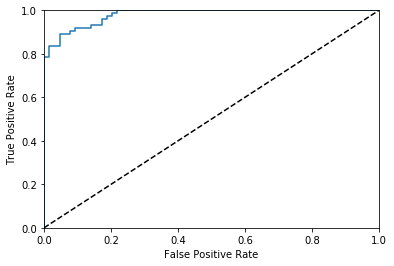

In [10]:
# ROC curve for in-sample
fpr,tpr,thresholds= roc_curve(yTrain,trainPred)
roc_auc = auc(fpr,tpr)
print(roc_auc)

# plot ROC curve
plt.plot(fpr,tpr,label='ROC curve %0.2f' % roc_auc)
plt.plot([0,1],[0,1],'k--') # 折线图，
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

0.8484848484848485


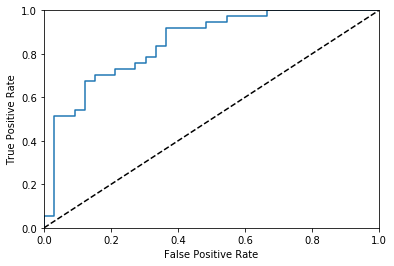

In [11]:
# ROC curve for out-sample
fpr,tpr,thresholds= roc_curve(yTest,testPred)
roc_auc = auc(fpr,tpr)
print(roc_auc)

# plot ROC curve
plt.plot(fpr,tpr,label='ROC curve %0.2f' % roc_auc)
plt.plot([0,1],[0,1],'k--') # 折线图，
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [15]:
print(fpr[:10])
print(tpr[:10])
print(thresholds[:10])

[0.         0.         0.         0.03030303 0.03030303 0.09090909
 0.09090909 0.12121212 0.12121212 0.15151515]
[0.         0.02702703 0.05405405 0.05405405 0.51351351 0.51351351
 0.54054054 0.54054054 0.67567568 0.67567568]
[3.44700495 2.44700495 1.66643061 1.61012761 0.83392509 0.80418634
 0.73979985 0.6995368  0.60898944 0.59016443]


In [16]:
len(fpr)

28